# Lecture 16: Newton's method

## Examples

### Example 1

Use Newton's method to approximate the value of $\sqrt{2}$ by solving $x^2 - R = 0$.

$$
     f(x) = x^2 - R
     \:
     \Rightarrow
     \:
     f'(x) = 2x
     \:
     \Rightarrow
     \:
     x^{(i+1)} = x^{(i)} - \frac{(x^{(i)})^2 - R}{2 x^{(i)}}.
$$

In [1]:
def f(x):
    return x * x - 2


def df(x):
    return 2 * x


it = 0
x = 1.0
tol = 1.0e-4

headers = ["iter", "x", "f(x)"]
data = []

it = 0
data.append([it, x, f(x)])

while abs(f(x)) > tol:
    x -= f(x) / df(x)
    it += 1
    data.append([it, x, f(x)])

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of Newton's method on example 1")

iter,x,f(x)
0,1.000000,-1.000000
1,1.500000,0.250000
2,1.416667,0.006944
3,1.414216,0.000006


-   We get the root as $x^* \approx 1.414216$ after 3 iterations.
-   The iteration stopped when $|f(x^{(i)})| < 10^{-4}$.
-   We could also require that $|x^{(i+1)} - x^{(i)} < 10^{-4}$.

### Example 2

Starting from $x^{(0)} = 1$ with $TOL = 10^{-4}$, we get the root as $x^* \approx 0.765789$ after 2 iterations for the NACA0012 aerofoil example.

In [2]:
import numpy as np


def f(x):
    t = 0.1

    yp = (
        -0.1015 * np.power(x, 4)
        + 0.2843 * np.power(x, 3)
        - 0.3516 * np.power(x, 2)
        - 0.126 * x
        + 0.2969 * np.sqrt(x)
    )
    f = yp - 0.5 * t

    return f


def df(x):
    dy = (
        -4 * 0.1015 * np.power(x, 3)
        + 3 * 0.2843 * np.power(x, 2)
        - 2 * 0.3516 * x
        - 0.126
        + 0.2969 * 0.5 * np.power(x, -0.5)
    )
    f = dy

    return f


it = 0
x = 1.0
tol = 1.0e-4

headers = ["iter", "x", "f(x)"]
data = []

it = 0
data.append([it, x, f(x)])

while abs(f(x)) > tol:
    x -= f(x) / df(x)
    it += 1
    data.append([it, x, f(x)])

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of Newton's method on example 2")

iter,x,f(x)
0,1.000000,-0.047900
1,0.795168,-0.005392
2,0.765789,-0.000096


### Example 3

 Starting from $x^{(0)} = 0.1$ with $TOL = 10^{-4}$, we get the root as $x^* \approx 0.033863$ after 5 iterations for the second solution to the NACA0012 aerofoil example.

In [3]:
import numpy as np


def f(x):
    t = 0.1

    yp = (
        -0.1015 * np.power(x, 4)
        + 0.2843 * np.power(x, 3)
        - 0.3516 * np.power(x, 2)
        - 0.126 * x
        + 0.2969 * np.sqrt(x)
    )
    f = yp - 0.5 * t

    return f


def df(x):
    dy = (
        -4 * 0.1015 * np.power(x, 3)
        + 3 * 0.2843 * np.power(x, 2)
        - 2 * 0.3516 * x
        - 0.126
        + 0.2969 * 0.5 * np.power(x, -0.5)
    )
    f = dy

    return f


it = 0
x = 0.1
tol = 1.0e-4

headers = ["iter", "x", "f(x)"]
data = []

it = 0
data.append([it, x, f(x)])

while abs(f(x)) > tol:
    x -= f(x) / df(x)
    it += 1
    data.append([it, x, f(x)])

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of Newton's method on example 3")

iter,x,f(x)
0,0.100000,0.028046
1,0.000278,-0.045086
2,0.005413,-0.028849
3,0.020693,-0.010046
4,0.031958,-0.001300
5,0.033863,-0.000024


In all cases the performance is considerable superior to that of the bisection method.

## Zero derivative as a root

-   We saw that the bisection method cannot deal with the situation where a root occurs at a *turning point*. That is,

    $$
    f(x^*) = f'(x^*) = 0.
    $$

-   At first sight, it may appear that Newton's method will struggle with such situations since $x^{(i+1)} = x^{(i)} - \frac{f(x^{(i)})}{f'(x^{(i)})}$ would lead to $\frac{0}{0}$ occurring when $x^{(i)} = x^*$.

-   Fortunately, this is not a problem in practice and the iteration can still converge - although it converges more slowly than to a "simple root".

### Zero derivative as a root - example

Find a solution of $f(x) = 0$ using Newton's method when

$$
f(x) = (x-1)^2 = x^2 - 2x + 1.
$$

This has a solution $x^* = 1$, however $f'(x) = 2x - 2$, so $f'(x^*) = 0$ when $x = x^*= 1$. The Newton iteration is given by

$$
x^{(i+1)} = x^{(i)} - \frac{(x^{(i)} - 1)^2}{2 x^{(i)} - 2}
= x^{(i)} - \frac{1}{2}(x^{(i)} - 1)
= \frac{1}{2} (x^{(i)} + 1).
$$

In [4]:
import numpy as np


def f(x):
    return (x - 1) ** 2


def df(x):
    return 2 * (x - 1)


it = 0
x = 4.0
tol = 1.0e-4

["iter", "x", "f(x)"]
data = []

it = 0
data.append([it, x, f(x)])

while abs(f(x)) > tol:
    x -= f(x) / df(x)
    it += 1
    data.append([it, x, f(x)])

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption(
    "Results of Newton's method on example with zero derivative at root"
)

iter,x,f(x)
0,4.000000,9.000000
1,2.500000,2.250000
2,1.750000,0.562500
3,1.375000,0.140625
4,1.187500,0.035156
5,1.093750,0.008789
6,1.046875,0.002197
7,1.023438,0.000549
8,1.011719,0.000137
9,1.005859,0.000034


Starting from $x^{(0)} = 4$ with $TOL = 10^{-4}$ we get the root as $x^* \approx 1.0059$ after 9 iterations, confirming that we are able to obtain a solution.

Note that the convergence criterion is $|f(x)| < 10^{-4}$, which does not guarantee that $|x^* - x^{(i)}| < 10^{-4}$!

## Problems with Newton's method

When Newton's method works it is a fast way of solving a nonlinear equation $f(x) = 0$, but it does not always work.

1.  Consider applying a Newton iteration to the function $f(x) = x^3 + 2 x^2 + x + 1$ with $x^{(0)} = 0$.

    This gives $f'(x) = 3 x^2 + 4 x + 1$ so Newton's iteration is:

     $$
     x^{(i+1)} = x^{(i)} - \frac{(x^{(i)})^3 + 2 (x^{(i)})^2 + x^{(i)} + 1}{3 (x^{(i)})^2 + 4 x^{(i)} + 1}.
     $$

    With $x^{(0)} = 0$ this gives

    $$
    \begin{aligned}
     x^{(1)}
     & = 0 - \frac{0^3 + 2 \times 0^2 + 0 + 1}{3 \times 0^2 + 4 \times 0 + 1}
     = 0 - \frac{1}{1} = -1 \\
     x^{(2)}
     & = -1 - \frac{(-1)^3 + 2 \times (-1)^2 + -1 + 1}{3 \times (-1)^2 + 4 \times -1 + 1}
     = -1 - \frac{1}{0} = \text{inf}.
     \end{aligned}
    $$

2.  We can also get cases where the iteration does not "blow up" but diverges slowly...

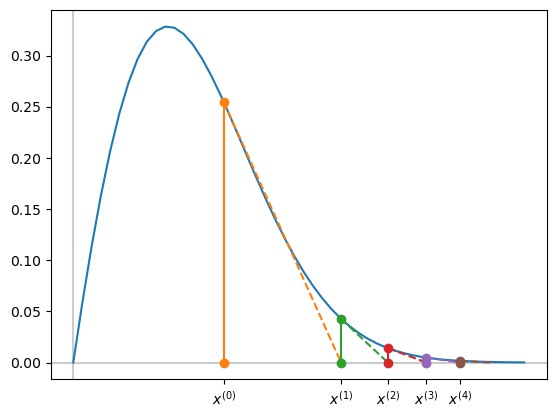

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.log(t + 1) * np.exp(-(t**2))


def df(t):
    return np.exp(-(t**2)) / (t + 1) - 2 * t * np.log(t + 1) * np.exp(-(t**2))


plt.axhline(0, color="0.8")  # x = 0
plt.axvline(0, color="0.8")  # y = 0

x = np.linspace(0, 3)
y = f(x)

plt.plot(x, y)

x = 1.0
ticks = []
ticklabels = []

for i in range(5):
    p0 = plt.plot([x, x], [0, f(x)], "o-")
    ticks.append(x)
    ticklabels.append(r"$x^{(" + str(i) + ")}$")

    x_new = x - f(x) / df(x)
    plt.plot([x, x_new], [f(x), 0], "--", color=p0[0].get_color())
    x = x_new

plt.xticks(ticks, ticklabels)
plt.show()

3.  It is even possible for the iteration to simply cycle between two values repeatedly...

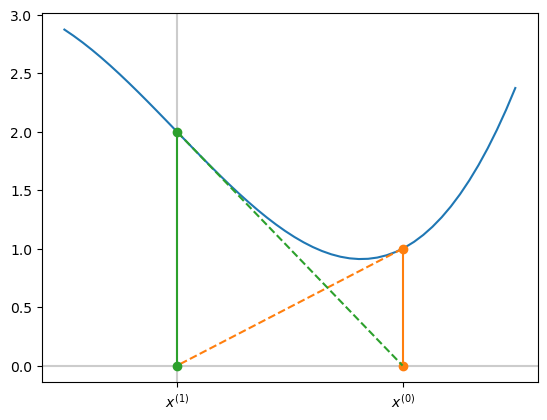

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return t**3 - 2 * t + 2


def df(t):
    return 3 * t**2 - 2


plt.axhline(0, color="0.8")  # x = 0
plt.axvline(0, color="0.8")  # y = 0

x = np.linspace(-0.5, 1.5)
y = f(x)

plt.plot(x, y)

x = 1.0
ticks = []
ticklabels = []

for i in range(2):
    p0 = plt.plot([x, x], [0, f(x)], "o-")
    ticks.append(x)
    ticklabels.append(r"$x^{(" + str(i) + ")}$")

    x_new = x - f(x) / df(x)
    plt.plot([x, x_new], [f(x), 0], "--", color=p0[0].get_color())
    x = x_new

plt.xticks(ticks, ticklabels)
plt.show()

### Exercise (homework - hard!)

Can you find a Newton iteration with period 3 or more?

## Summary

-   Newton's method yields a relatively simple iteration for solving $f(x) = 0$.

-   When the algorithm converges it **usually** does so very quickly.

-   There are a number of cases for which the method breaks down - a number of initial guesses maybe required:

    -   the initial iterate must be "sufficiently close" to a root;
    -   a good initial guess may sometimes be obtained from the bisection method.

-   Newton's method assumes that the derivative of the function $f(x)$ is known and easily evaluated.


The [slides used in the lecture](./lec15_.ipynb) are also available